In [14]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st



In [15]:
df = pd.read_csv('../GW-Project-1/BPD_Part_1_Victim_Based_Crime_Data.csv')
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
0,09/02/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1
1,09/02/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NaN,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1
2,09/02/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1
3,09/02/2017,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1
4,09/02/2017,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,"(39.2875600000, -76.6136500000)",STREET,1


In [19]:
# data cleaning and organization

# remove series
df.drop(columns=["CrimeCode", "Post"], inplace=True)

# consolidate Inside/Outside values, merging "O" and "I" with "Outside" and "Inside"
df["Inside/Outside"] = df["Inside/Outside"].replace({"Outside": "O", "Inside": "I"})

# convert day to datetime data type
df.CrimeDate = pd.to_datetime(df.CrimeDate)

# change midnight for to_datetime
# create temp series CrimeTimeTemp for splitting data into Time of Day
df.loc[df.CrimeTime == "24:00:00", "CrimeTime"] = "00:00:00"
df["CrimeTimeTemp"] = pd.to_datetime(df.CrimeTime, format="%H:%M:%S")

# create bins and labels for morning, afternoon, evening, late night
# -1 because it kept populating "Time of Day" with NaN for any 0 hours (12am)
bins = [-1, 6, 12, 18, 24]
labels = ["Late Night", "Morning", "Afternoon", "Evening"]

# pd.cut likes ints, so dt.hour extracts the hour for comparison with bins
# remove CrimeTimeTemp from the df
df["Time of Day"] = pd.cut(
    df.CrimeTimeTemp.dt.hour, bins=bins, labels=labels
)
df.drop(columns=["CrimeTimeTemp"], inplace=True)

# add 'Day of Week' series
df["Day of Week"] = df["CrimeDate"].dt.day_name()



In [20]:
df

,CrimeDate,CrimeTime,Location,Description,Inside/Outside,Weapon,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents,Time of Day,Day of Week
0,2017-09-02,23:30:00,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1,Evening,Saturday
1,2017-09-02,23:00:00,800 NEWINGTON AVE,AUTO THEFT,O,NaN,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1,Evening,Saturday
2,2017-09-02,22:53:00,600 RADNOR AV,SHOOTING,O,FIREARM,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1,Evening,Saturday
3,2017-09-02,22:50:00,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1,Evening,Saturday
4,2017-09-02,22:31:00,100 LIGHT ST,COMMON ASSAULT,O,HANDS,CENTRAL,Downtown West,-76.61365,39.28756,"(39.2875600000, -76.6136500000)",STREET,1,Evening,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276524,2012-01-01,00:00:00,1400 JOH AVE,LARCENY,I,NaN,SOUTHWESTERN,Violetville,-76.67195,39.26132,"(39.2613200000, -76.6719500000)",OTHER - IN,1,Late Night,Sunday
276525,2012-01-01,00:00:00,5500 SINCLAIR LN,LARCENY,O,NaN,NORTHEASTERN,Frankford,-76.53829,39.32493,"(39.3249300000, -76.5382900000)",OTHER - OU,1,Late Night,Sunday
276526,2012-01-01,00:00:00,400 N PATTERSON PK AV,LARCENY,O,NaN,EASTERN,CARE,-76.58497,39.29573,"(39.2957300000, -76.5849700000)",STREET,1,Late Night,Sunday
276527,2012-01-01,00:00:00,5800 LILLYAN AV,BURGLARY,I,NaN,NORTHEASTERN,Glenham-Belhar,-76.54578,39.34701,"(39.3470100000, -76.5457800000)",APT. LOCKE,1,Late Night,Sunday


In [59]:
crime_per_District = df.groupby('District').size().reset_index(name='Total_Crimes')

In [60]:
import matplotlib.pyplot as plt


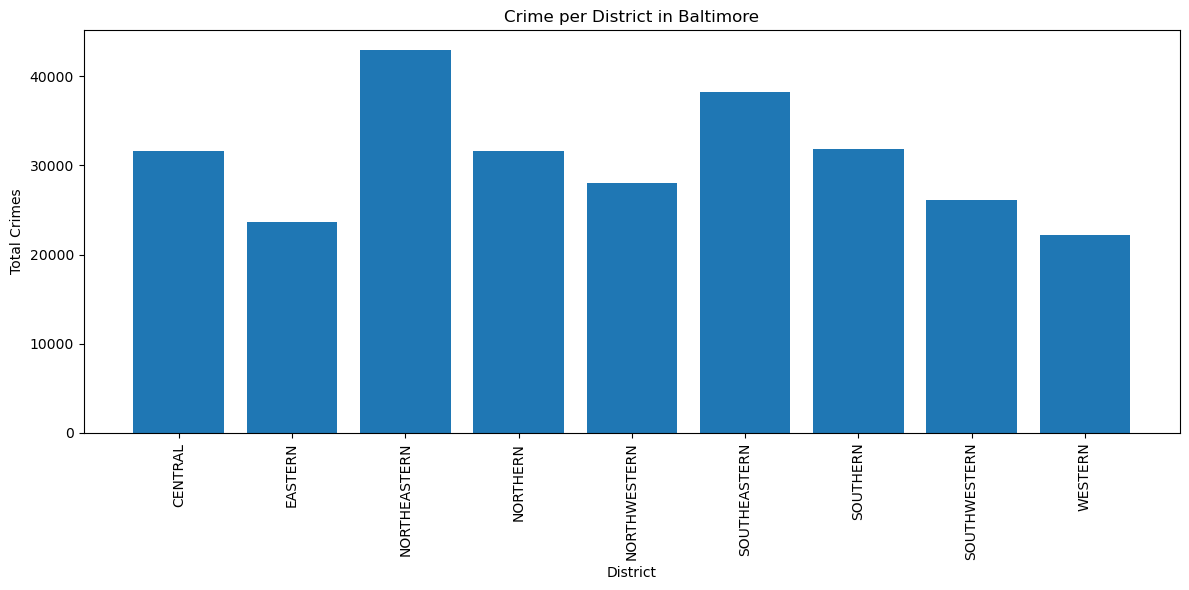

In [61]:
plt.figure(figsize=(12, 6))
plt.bar(crime_per_District['District'], crime_per_District['Total_Crimes'])
plt.xlabel('District')
plt.ylabel('Total Crimes')
plt.title('Crime per District in Baltimore')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [62]:
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])


In [63]:
crime_by_year = df.groupby(df['CrimeDate'].dt.year).size().reset_index(name='Total_Crimes')



In [64]:
most_crime_year = crime_by_year.loc[crime_by_year['Total_Crimes'].idxmax()]




In [65]:
print("Year with the highest crime rate:", most_crime_year['CrimeDate'])
print("Total crimes in that year:", most_crime_year['Total_Crimes'])

Year with the highest crime rate: 2012
Total crimes in that year: 49575


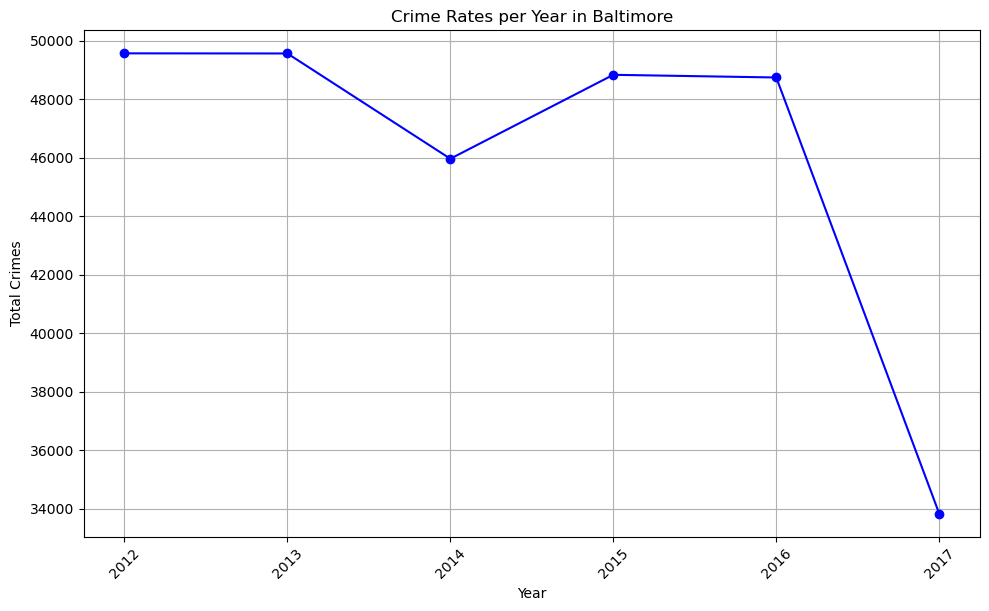

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(crime_by_year['CrimeDate'], crime_by_year['Total_Crimes'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.title('Crime Rates per Year in Baltimore')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [76]:

df['CrimeTime'] = pd.to_datetime(df['CrimeTime'])

In [77]:
df['Hour'] = df['CrimeTime'].dt.hour

In [78]:
crime_by_hour = df.groupby('Hour').size().reset_index(name='Total_Crimes')

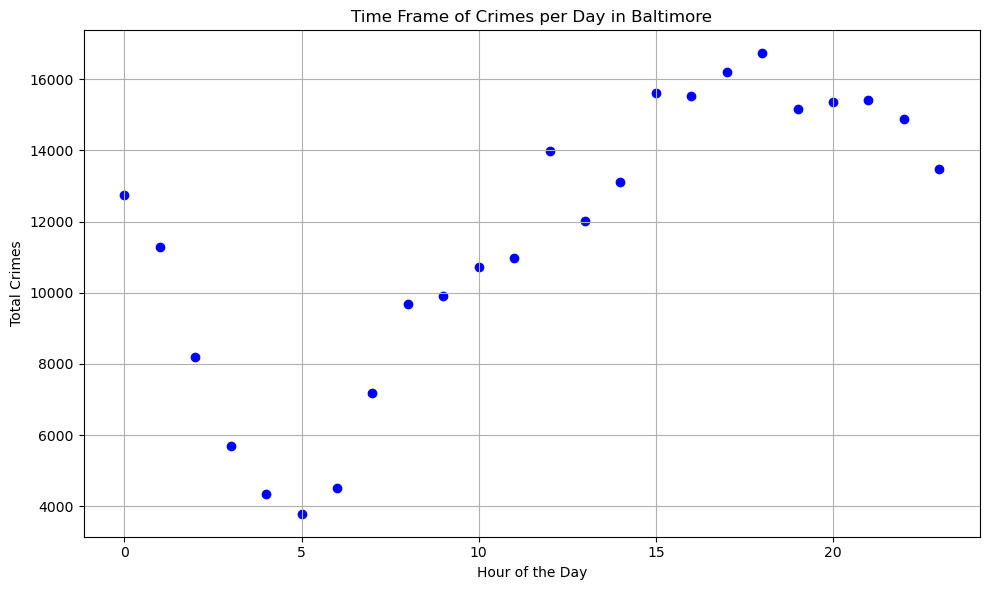

In [79]:
plt.figure(figsize=(10, 6))
plt.scatter(crime_by_hour['Hour'], crime_by_hour['Total_Crimes'], marker='o', color='b')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Crimes')
plt.title('Time Frame of Crimes per Day in Baltimore')
plt.grid(True)
plt.tight_layout()
plt.show()

In [80]:
hour_with_most_crimes = crime_by_hour.loc[crime_by_hour['Total_Crimes'].idxmax()]

print("Hour with the most crimes:", hour_with_most_crimes['Hour'])
print("Total crimes in that hour:", hour_with_most_crimes['Total_Crimes'])

Hour with the most crimes: 18
Total crimes in that hour: 16724


In [82]:
from datetime import datetime

def military_to_digital(military_time):
    try:
        military_time_obj = datetime.strptime(military_time, '%H:%M')
        digital_time = military_time_obj.strftime('%I:%M %p')
        return digital_time
    except ValueError:
        return "Invalid military time format."

In [84]:
military_time = "18:00"
digital_time = military_to_digital(military_time)
print("Digital Time:", digital_time)

Digital Time: 06:00 PM
